In [44]:
from manim import*
from pprint import pprint
from time import sleep
_RF = '-v WARNING --disable_caching -qm'
config.media_width = '100%'
config.media_embed = True

Manim Community v0.19.0

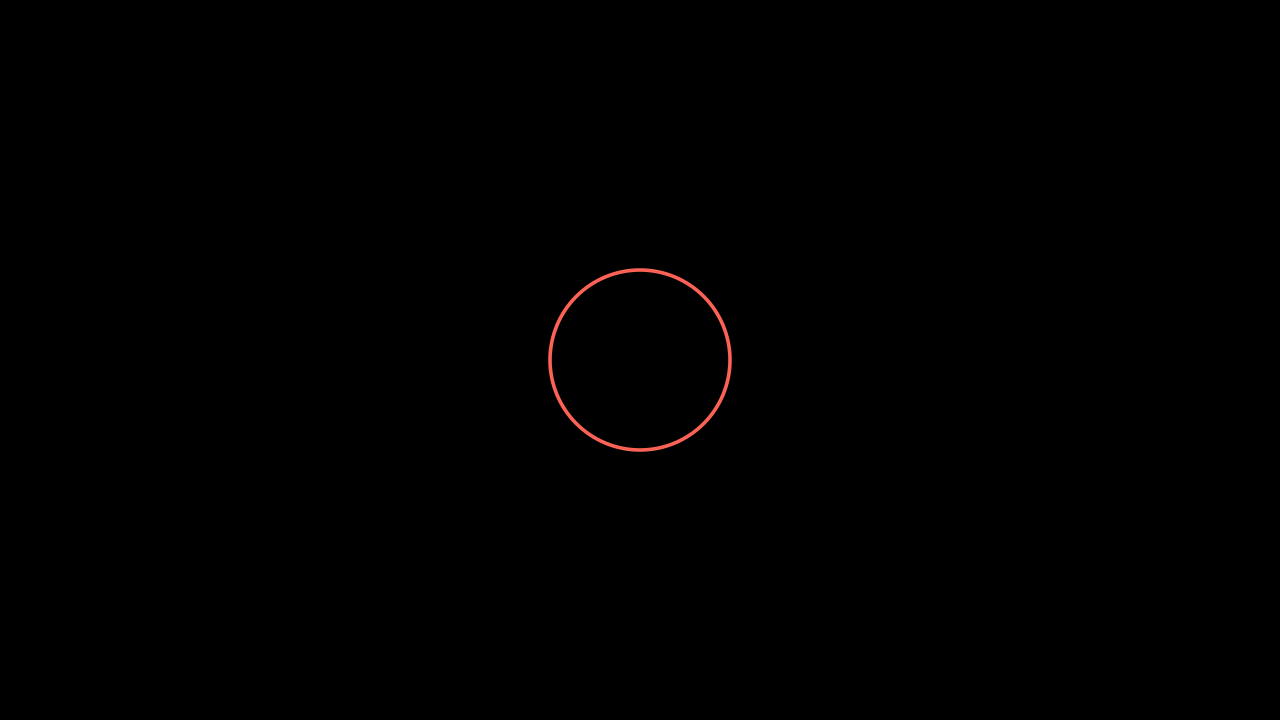

In [3]:
class Test(Scene):
    def construct(self):
        self.add(Circle())
%manim $_RF Test

In [5]:
# 我先先弄一下放缩吧,放缩明确了,就好很多了,这样之后细节展示方便些吧


Manim Community v0.19.0

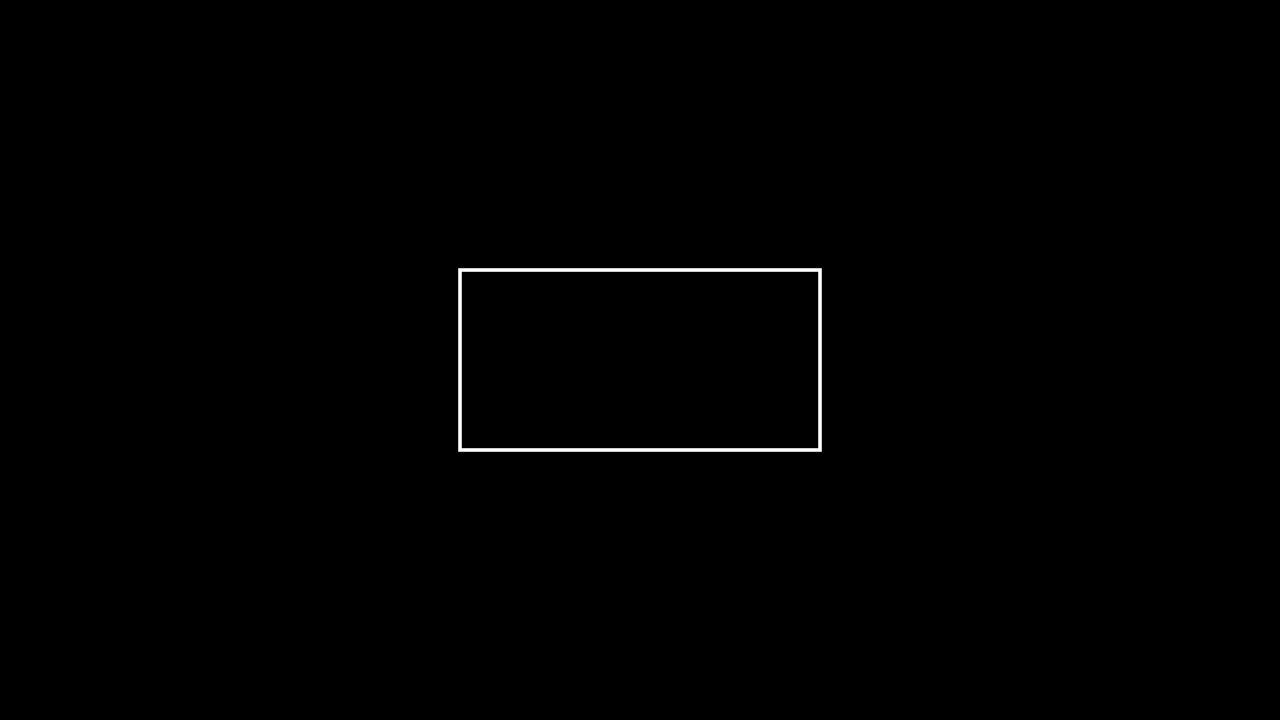

In [12]:
class Test(MovingCameraScene):
    def construct(self):
        camera_frame = self.camera.frame
        camera_frame.save_state()
        rec = Rectangle()
        camera_frame.set(width = rec.width)
        camera_frame.move_to(rec.get_center())
        camera_frame.restore()
        self.add(rec)
%manim $_RF Test

Manim Community v0.19.0

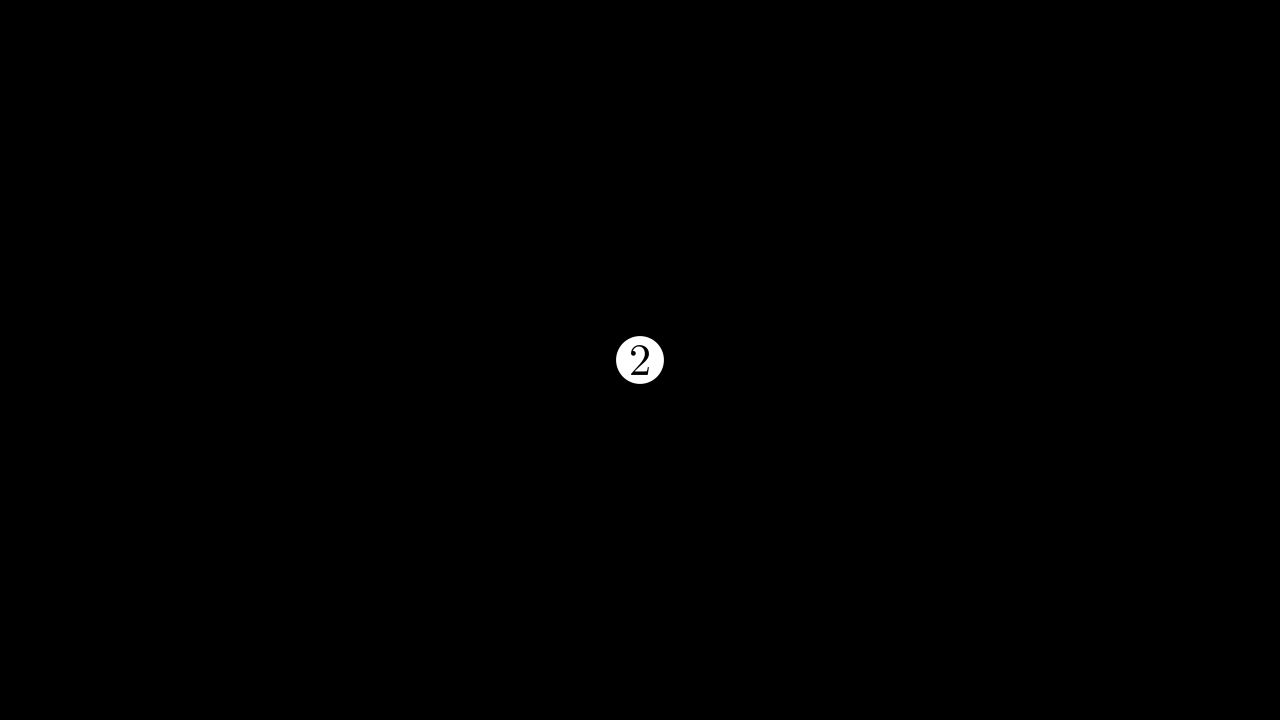

In [ ]:
class Test(MovingCameraScene):
    def construct(self):

        dot = LabeledDot("2")
        self.add(dot)
%manim $_RF Test

In [61]:
# 接下来是准备一下全排列的算法,然后做一个回溯算法可视化

# 思考一下需要什么参数
# 1原始列表 2返回所有全排列的列表 3过度列表(待定)
lll = []
def find_remaining_per(origin_list:list, return_list:list, excessive_list: list):
    if len(origin_list) == 0:
        return_list.append(excessive_list.copy())# 这里必须是.copy() python列表是可变对象,且引用传递，回溯递归的话会导致excessive_list一直为空
        return 
    
    
    for data in origin_list:
        temp_list = origin_list.copy()
        temp_list.remove(data)
        excessive_list.append(data)
        find_remaining_per(temp_list,return_list, excessive_list)
        excessive_list.remove(data)
    return return_list
l = [1,2,3,4]

ll = find_remaining_per(l, [], [])
pprint(ll)



[[1, 2, 3, 4],
 [1, 2, 4, 3],
 [1, 3, 2, 4],
 [1, 3, 4, 2],
 [1, 4, 2, 3],
 [1, 4, 3, 2],
 [2, 1, 3, 4],
 [2, 1, 4, 3],
 [2, 3, 1, 4],
 [2, 3, 4, 1],
 [2, 4, 1, 3],
 [2, 4, 3, 1],
 [3, 1, 2, 4],
 [3, 1, 4, 2],
 [3, 2, 1, 4],
 [3, 2, 4, 1],
 [3, 4, 1, 2],
 [3, 4, 2, 1],
 [4, 1, 2, 3],
 [4, 1, 3, 2],
 [4, 2, 1, 3],
 [4, 2, 3, 1],
 [4, 3, 1, 2],
 [4, 3, 2, 1]]


Manim Community v0.19.0

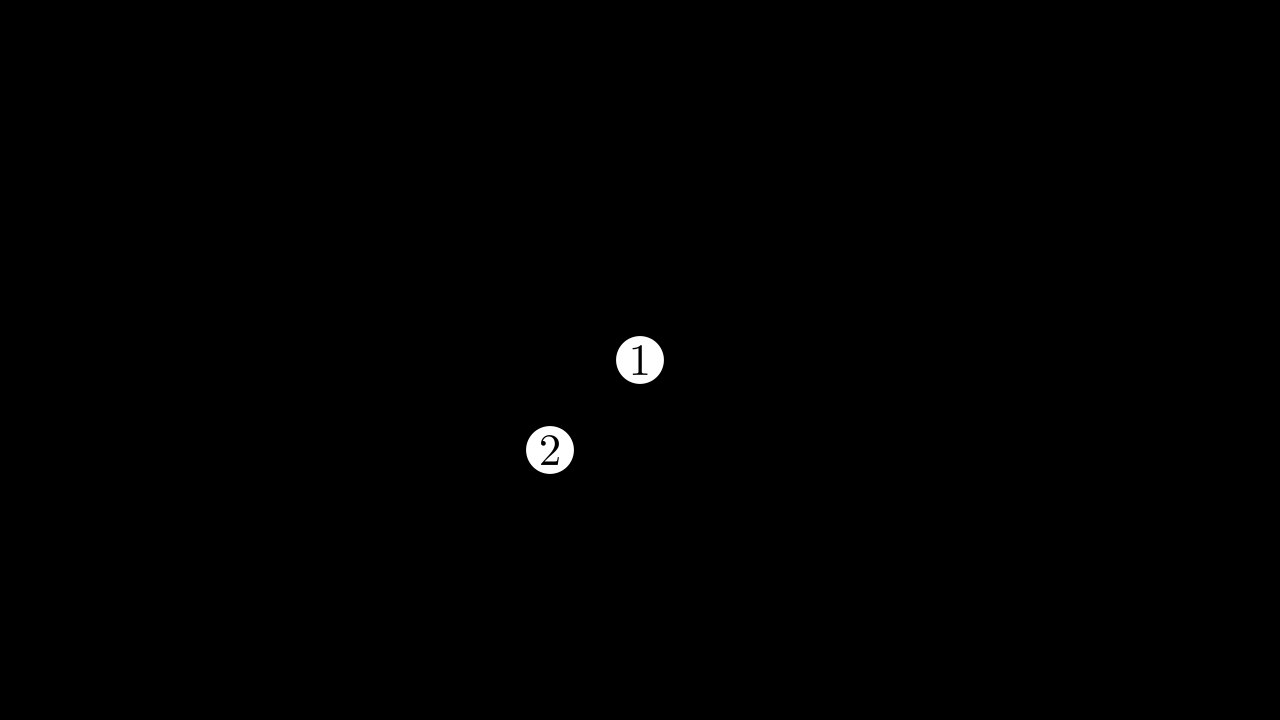

In [ ]:
# 好了,接下来我们需要按照上面的递归逻辑,产生我们的排列树了.

# 设计思想 我们需要给谁创建节点?想了想,似乎是data
# 如果每一个labeldot,对应1个data,之后的问题是如何放置
# 我们现在找个比较好的排列方式吧.

# 如果使用.arrange排放,是广度优先,但是我们是深度优先存储的.
class Test(Scene):
    def construct(self):
        l1 = LabeledDot("1")
        l2 = LabeledDot("2")
        l2.shift(DL)
        self.add(l1,l2)
%manim $_RF Test

In [41]:
from collections import deque

class BFS_Permutation_Visualization(MovingCameraScene):
    def construct(self):
        nums = [1, 2, 3]
        queue = deque()
        queue.append([])
        layers = [[[]]]  # 保存每一层的节点
        edges = []       # 保存边
        self.camera.frame.set(height = 25)

        # BFS 构建层数据
        for num in nums:
            level_size = len(queue)
            new_layer = []
            for _ in range(level_size):
                old_perm = queue.popleft()
                for i in range(len(old_perm) + 1):
                    new_perm = old_perm[:i] + [num] + old_perm[i:]
                    queue.append(new_perm)
                    new_layer.append(new_perm)
                    edges.append((old_perm, new_perm))
            layers.append(new_layer)

        # 绘制每一层的节点
        node_mobs = {}
        y_gap = 2.0
        for layer_idx, layer in enumerate(layers):
            x_gap = 2.0
            start_x = - (len(layer) - 1) * x_gap / 2
            for i, perm in enumerate(layer):
                label = Text(str(perm), font_size=30)
                label.move_to([start_x + i * x_gap, -layer_idx * y_gap, 0])
                node_circle = Circle(radius=0.5, color=BLUE).move_to(label.get_center())
                node_group = VGroup(node_circle, label)
                node_group.shift(UP*2)
                self.play(FadeIn(node_group))
                node_mobs[tuple(perm)] = node_group
            self.wait(0.5)

        # 绘制边
        for old, new in edges:
            old_node = node_mobs[tuple(old)]
            new_node = node_mobs[tuple(new)]
            arrow = Arrow(old_node.get_center(), new_node.get_center(), buff=0.5, stroke_width=2)
            self.play(Create(arrow), run_time=0.3)
        self.wait(2)
%manim $_RF BFS_Permutation_Visualization

Manim Community v0.19.0

In [58]:
class TreeScene(Scene):
    def construct(self):
        # 树的层级数据（按 BFS 层次）
        layers = [
            [1],
            [2, 3, 4],
            [3, 4, 2, 4, 2, 3],
            [4, 3, 4, 2, 3, 2]
        ]

        tree_group = VGroup()
        node_positions = {}  # 保存节点位置

        # 垂直间距和水平间距
        y_gap = 2
        x_gap = 1.5

        for layer_index, layer_nodes in enumerate(layers):
            y = -layer_index * y_gap
            # 让每一层节点居中
            total_width = (len(layer_nodes) - 1) * x_gap
            start_x = -total_width / 2
            for i, value in enumerate(layer_nodes):
                pos = [start_x + i * x_gap, y, 0]
                dot = LabeledDot(str(value), radius=0.3, color=BLUE).move_to(pos)
                tree_group.add(dot)
                node_positions[(layer_index, i)] = dot

        # 画边（假设完全二叉树结构，父节点依次连接下一层）
        edge_group = VGroup()
        for layer_index in range(len(layers) - 1):
            parent_count = len(layers[layer_index])
            child_count = len(layers[layer_index + 1])
            ratio = child_count / parent_count  # 每个父节点的孩子数
            for i in range(parent_count):
                parent_node = node_positions[(layer_index, i)]
                for j in range(int(ratio)):
                    child_idx = int(i * ratio + j)
                    child_node = node_positions[(layer_index + 1, child_idx)]
                    edge_group.add(Line(parent_node.get_center(), child_node.get_center()))

        full_tree = VGroup(edge_group, tree_group)

        # 设置相机宽度为树宽 - 1
        full_tree.height = config.frame_height - 1
        full_tree.move_to(ORIGIN)
        # 展示
        self.play(Create(edge_group), FadeIn(tree_group))
        self.wait(2)
%manim $_RF TreeScene

Manim Community v0.19.0

In [95]:
ans_list = []
def find_remaining_per(origin_list:list, excessive_list: list):
    global ans_list
    if len(origin_list) == 0:
        return 
    
    
    for data in origin_list:
        ans_list.append(data)
        temp_list = origin_list.copy()
        temp_list.remove(data)
        excessive_list.append(data)
        find_remaining_per(temp_list, excessive_list)
        excessive_list.remove(data)
        if len(ans_list) == 16:
            break

l = [1,2,3,4]
find_remaining_per(l, [])
# print(len(ans_list))
# ans_list = ans_list[:16]
# print(len(ans_list))
pprint(ans_list)

[1, 2, 3, 4, 4, 3, 3, 2, 4, 4, 2, 4, 2, 3, 3, 2]


In [96]:
# 整体上有思路了, 但是对象如何摆放呢?
# 按比例，或者VGroup()采用VGroup()似乎只能横向排列,或者竖向排列
# 算了,测试一下吧.

Manim Community v0.19.0

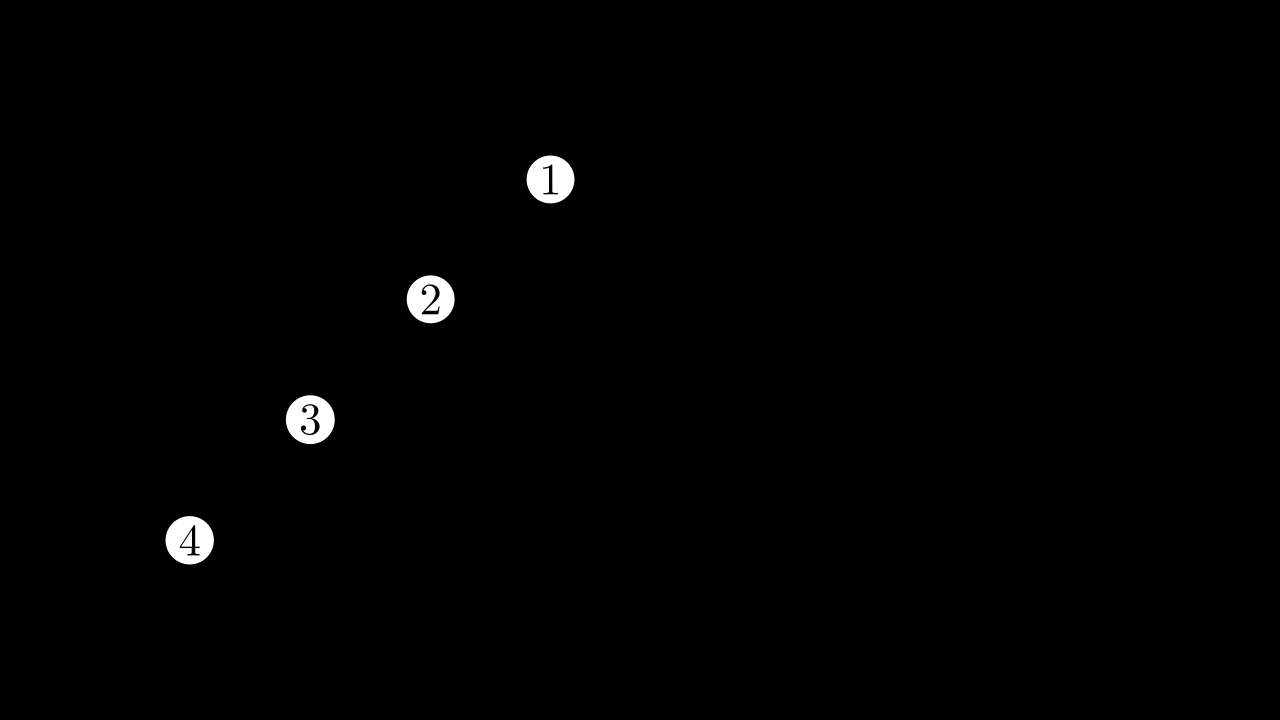

In [ ]:
class Test(Scene):
    def construct(self):
        l1 = LabeledDot("1")
        l2 = LabeledDot("2")
        l3 = LabeledDot("3")
        l4 = LabeledDot("4")
        grps1 = VGroup(l1,l2,l3,l4)
        grps1.arrange(LEFT+DOWN, buff = 0.8)
        grps1.move_to([-3,0,0])
        self.add(grps1)
        l5 = LabeledDot("4")
        l6 = LabeledDot("3")
        grps2 = VGroup(l5, l6)
%manim $_RF Test

In [109]:
# 又饶了一圈,仔细思考了一下,其实还是递归添加就好.
# 因为我们总能确定好锚点,锚点就是excessive_list的最后一个数
# 现在需要考虑的问题是距离设置.
# 我这里考虑的是可以根据excessive_list的数量设计距离.
# 比如我这里,excessive_list中,只有一个数1,那么我们知道,第二列就会有三个节点,然后控制好距离
# excessive_list中有两个数,那么我就需要设计两个 等等等等

Manim Community v0.19.0

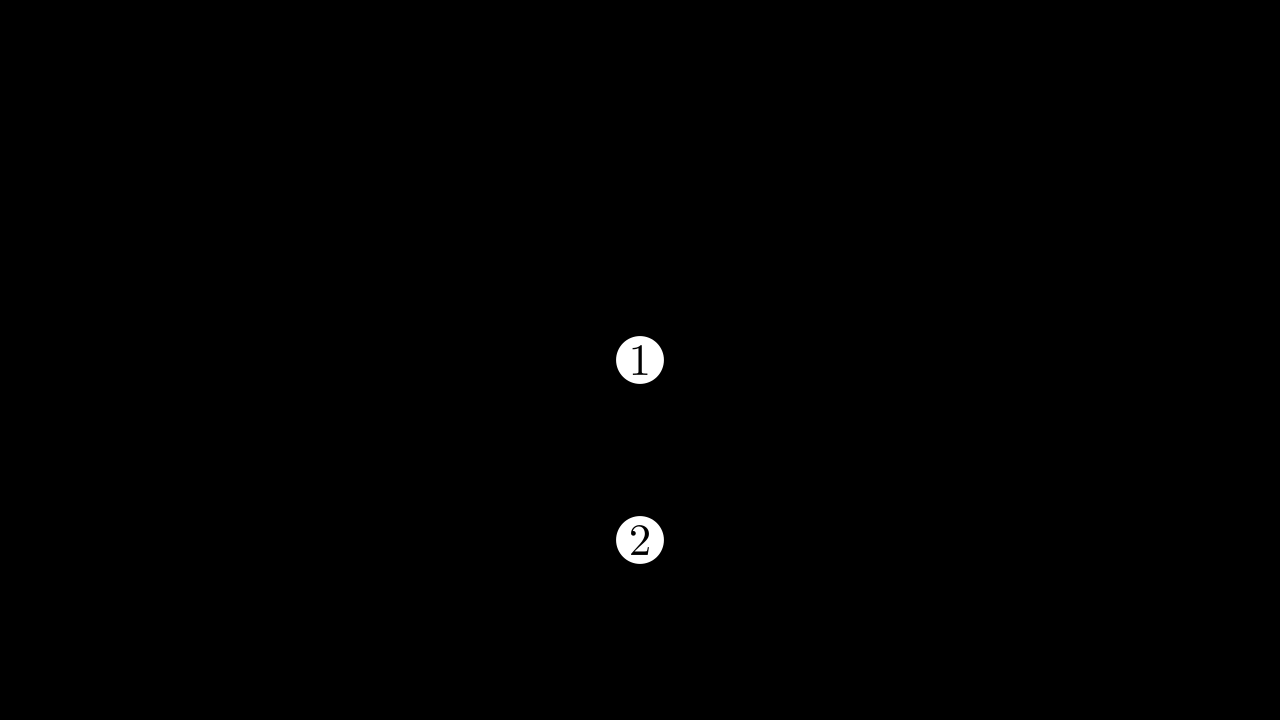

In [ ]:
# 设计Dot竖直方向上的距离
class Test(Scene):
    def construct(self):
        l1 = LabeledDot("1")
        l2 = LabeledDot("2")
        l2.shift(DOWN*2)
        l3 = LabeledDot("3")
        self.add(l1)
        self.add(l2)
%manim $_RF Test

In [114]:
class PermutationTree(Scene):
    def construct(self):
        # 定义原始列表
        l = [1, 2, 3, 4]
        
        # 创建一个容器来存储树
        tree_group = VGroup()

        # 定义递归函数来构建排列树
        def find_remaining_per(origin_list, excessive_list, depth=0, parent=None):
            if len(origin_list) == 0:
                # 叶子节点，表示一个排列结果
                leaf = self.create_leaf(excessive_list, depth)
                tree_group.add(leaf)
                if parent:
                    self.play(Transform(parent, leaf))
                return 

            for data in origin_list:
                # 创建当前节点
                node = self.create_node(data, depth)
                if parent:
                    self.play(Transform(parent, node))  # 递归动画连接
                
                # 创建递归树
                temp_list = origin_list.copy()
                temp_list.remove(data)
                excessive_list.append(data)

                # 递归调用
                find_remaining_per(temp_list, excessive_list, depth+1, node)

                # 回溯时显示动画
                excessive_list.remove(data)

        # 调用递归算法，传入空的列表
        find_remaining_per(l, [])

        # 显示整个排列树
        self.play(FadeIn(tree_group))

    def create_node(self, value, depth):
        """创建一个表示当前数字的树节点"""
        node = Circle(radius=0.3).set_color(WHITE)
        label = Text(str(value)).scale(0.5).move_to(node.get_center())
        group = VGroup(node, label)
        group.shift(RIGHT * depth)  # 将节点按照深度水平排列
        return group

    def create_leaf(self, excessive_list, depth):
        """创建一个叶子节点，表示一个完整的排列"""
        leaf = Text(str(excessive_list), font_size=24)
        leaf.move_to(RIGHT * depth)
        return leaf
%manim $_RF PermutationTree

Manim Community v0.19.0

Manim Community v0.19.0

[1, 2, 3, 4, 4, 3, 3, 2, 4, 4, 2, 4, 2, 3, 3, 2]
[LabeledDot, LabeledDot, LabeledDot, LabeledDot, LabeledDot, LabeledDot, LabeledDot, LabeledDot, LabeledDot, LabeledDot, LabeledDot, LabeledDot, LabeledDot, LabeledDot, LabeledDot, LabeledDot]


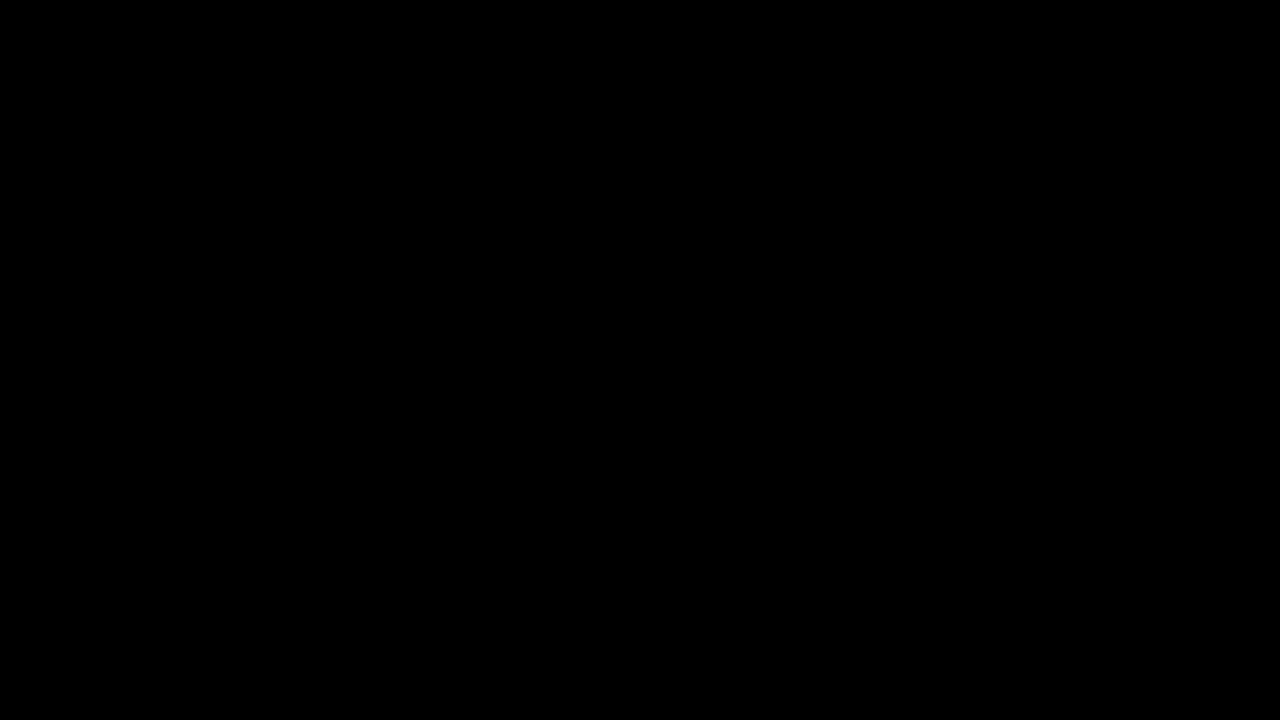

In [ ]:
class Test(Scene):
    ans_list = []
    mobject_list = []
    def find_remaining_per(self,origin_list:list, excessive_list:list):
        if len(origin_list) == 0:
            return 
        
        for data in origin_list:
            Test.ans_list.append(data)
            temp_list = origin_list.copy()
            temp_list.remove(data)
            excessive_list.append(data)
            # self.grps.add(LabeledDot(f"{data}"))
            Test.mobject_list.append(LabeledDot(f"{data}"))
            self.find_remaining_per(temp_list, excessive_list)
            excessive_list.remove(data)
            if len(Test.ans_list) == 16:
                break
    def construct(self):
        self.grps = VGroup()
        l = [1,2,3,4]
        self.find_remaining_per(l, [])
        self.grps.arrange(RIGHT)
        self.grps.width = config.frame_width - 1
        
        print(Test.ans_list)
        print(Test.mobject_list)
%manim $_RF Test

In [ ]:
# 想了想,问题的难点是位置不太好确定,如果是相对位置的话,递归深入进去,无法单独对每个对象进行操作
# 所以我们直接弄个绝对位置.
# 根据我们理想图,先直接绘制图像,然后再逐个获取对应的点坐标,
# 然后按照递归前序遍历的方式,将点坐标一一对应

Manim Community v0.19.0

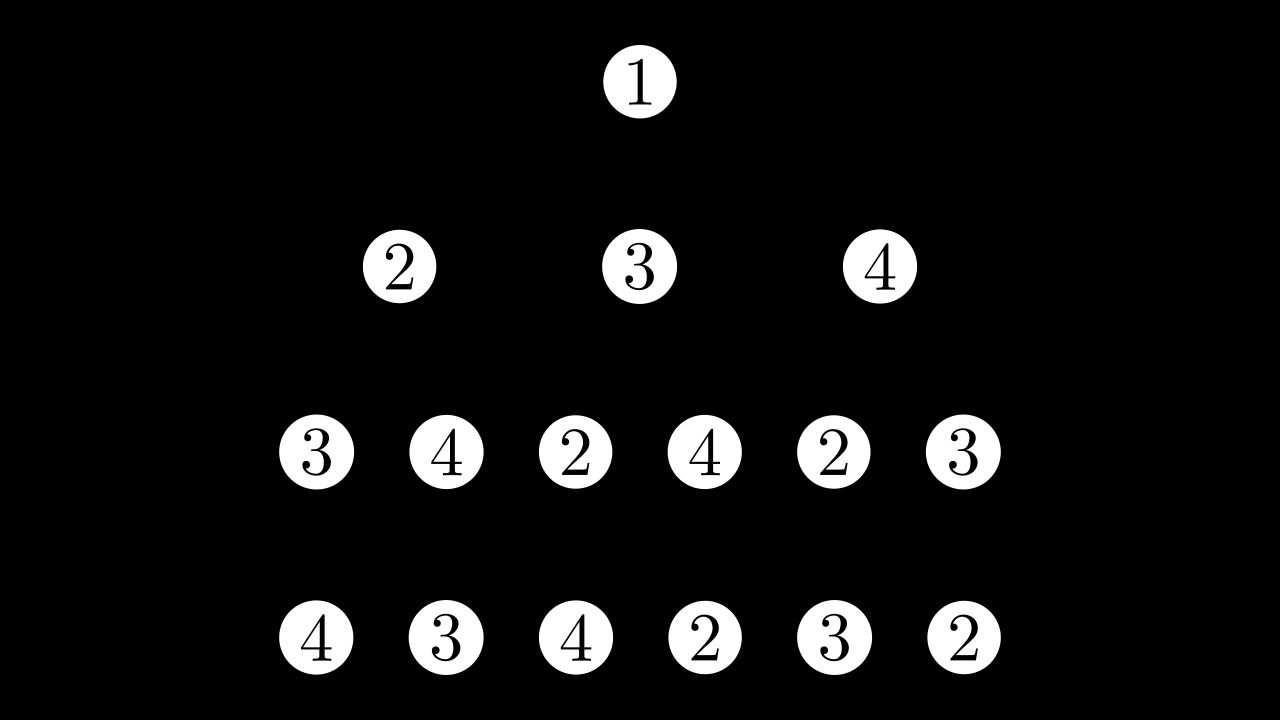

In [ ]:
class Test(Scene):
    def construct(self):
        l = [1,2,3,4,3,4,2,4,2,3,4,3,4,2,3,2]
        
        mobject_list = []
        for data in l:
            mobject_list.append(LabeledDot(f"{data}"))
        grps1 = VGroup(*mobject_list[:1]).arrange(RIGHT,)
        grps2 = VGroup(*mobject_list[1:4]).arrange(RIGHT, buff = 1.2)
        grps3 = VGroup(*mobject_list[4:10]).arrange(RIGHT, buff = 0.4)
        grps4 = VGroup(*mobject_list[-6:]).arrange(RIGHT, buff = 0.4)
        grps = VGroup(grps1, grps2, grps3, grps4).arrange(DOWN,buff = 0.8)
        # information = {}
        # information[0] = grps[0][0]
        # ll = list(range(1,4))
        # for index, j in enumerate(ll):
        #     information[j] =  grps[1][index]
        # lll = list(range(4,10))
        # for index, j in enumerate(lll):
        #     information[j] = grps[2][index]
        # self.add(information[9])
        # llll = list(range(10, 16))
        # for index, j in enumerate(llll):
        #     information[j] = grps[3][index]
        
        grps.height = config.frame_height - 1
        self.add(grps)
%manim $_RF Test

In [ ]:
# 接下来就是将这个grps带入进去,然后内部的数据如何访问呢?
# 穷举法,比较简单好想.
# 有没有其他的方法呢?

In [ ]:
class Test(Scene):
    ans_list = []
    index = 0
    pre_list = [1, 2, 3, 4]
    def find_remaining_per(self,origin_list:list, excessive_list:list):
        if len(origin_list) == 0:
            return 
        
        for data in origin_list:
            Test.ans_list.append(data)
            temp_list = origin_list.copy()
            temp_list.remove(data)
            excessive_list.append(data)
            self.play(Create(self.information[Test.index]), run_time = 2)
            self.wait()
            Test.index += 1
            self.find_remaining_per(temp_list, excessive_list)
            excessive_list.remove(data)
            if len(Test.ans_list) == 16:
                break
    def construct(self):
        l = [1,2,3,4,3,4,2,4,2,3,4,3,4,2,3,2]
        
        mobject_list = []
        for data in l:
            mobject_list.append(LabeledDot(f"{data}"))
        grps1 = VGroup(*mobject_list[:1]).arrange(RIGHT,)
        grps2 = VGroup(*mobject_list[1:4]).arrange(RIGHT, buff = 1.2)
        grps3 = VGroup(*mobject_list[4:10]).arrange(RIGHT, buff = 0.4)
        grps4 = VGroup(*mobject_list[-6:]).arrange(RIGHT, buff = 0.4)
        grps = VGroup(grps1, grps2, grps3, grps4).arrange(DOWN,buff = 0.8)
        self.information = {}
        self.information[0] =   
        self.information[1] = grps[1][0]
        self.information[2] = grps[2][0]
        self.information[3] = grps[3][0]
        self.information[4] = grps[2][1]
        self.information[5] = grps[3][1]
        self.information[6] = grps[1][1]
        self.information[7] = grps[2][2]
        self.information[8] = grps[3][2]
        self.information[9] = grps[2][3]
        self.information[10] = grps[3][3]
        self.information[11] = grps[1][2]
        self.information[12] = grps[2][4]
        self.information[13] = grps[3][4]
        self.information[14] = grps[2][5]
        self.information[15] = grps[3][5]
        grps.height = config.frame_height - 1
        self.find_remaining_per(Test.pre_list,[])
%manim $_RF Test

Manim Community v0.19.0